data from moneypuck.com

In [7]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving skaters2024-2025.csv to skaters2024-2025 (1).csv


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing

# find accuracy of random forest classifier
def modelscore(data):
  """loading data and cleaning the csv to contain only numeric information that is relevant and changing right (R)
  and left (L) winger to have the same value winger (W). Also set up classifier to be used later"""
  df = pd.read_csv(data)

  df = df[df['situation']=='all']

  df['position'] = df['position'].replace('L', 'W').replace('R', 'W')

  le = preprocessing.LabelEncoder()

  le.fit(['W', 'C', 'D'])

  y = df['position']


  df = df.select_dtypes(include='number')
  df['games_played'] = df['games_played'].astype(float)
  df = df.drop(columns=['playerId', 'season']) #irrelevant information
  df = df.drop(columns=['xGoalsForAfterShifts', 'xGoalsAgainstAfterShifts', 'corsiForAfterShifts', 'corsiAgainstAfterShifts', 'fenwickForAfterShifts', 'fenwickAgainstAfterShifts'])
  # values = 0 for all rows
  X = df.iloc[:, :]

  for col in range(139):
    X.iloc[:,col] = X.iloc[:,col].astype('float64')
    X.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()

  """takes target variable (y) and features (X) and attempts to classify them using Random Forest Classifier
  uses a train test split of 90% training and 10% testing"""

  data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.1, random_state=110)

  skaterforest = RandomForestClassifier(min_samples_split=10, random_state=110)
  skaterforest.fit(data_train, label_train)
  return skaterforest.score(data_test, label_test)


In [9]:
modelscore('skaters2024-2025.csv')

0.8260869565217391

# Most Impactful Features

In [10]:
df = pd.read_csv('skaters2024-2025.csv')

df = df[df['situation']=='all']

df['position'] = df['position'].replace('L', 'W').replace('R', 'W')

le = preprocessing.LabelEncoder()

le.fit(['W', 'C', 'D'])

y = df['position']


df = df.select_dtypes(include='number')
df['games_played'] = df['games_played'].astype(float)
df = df.drop(columns=['playerId', 'season']) #irrelevant information
df = df.drop(columns=['xGoalsForAfterShifts', 'xGoalsAgainstAfterShifts', 'corsiForAfterShifts', 'corsiAgainstAfterShifts', 'fenwickForAfterShifts', 'fenwickAgainstAfterShifts'])
# values = 0 for all rows
X = df.iloc[:, :]

for col in range(139):
  X.iloc[:,col] = X.iloc[:,col].astype('float64')
  X.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()

"""takes target variable (y) and features (X) and attempts to classify them using Random Forest Classifier
uses a train test split of 90% training and 10% testing"""

data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.1, random_state=110)

skaterforest = RandomForestClassifier(min_samples_split=10, random_state=110)
skaterforest.fit(data_train, label_train)
"""use feature_importances_ attribute to find the relative importance of all features
filter features to only find the most influential (at least 5%)"""


import numpy as np
importance = np.array(skaterforest.feature_importances_)

importance_index1 = np.where(importance >= 0.01)
for i in importance_index1:
  influential_stat1 = pd.Index(df.columns[i]).values
print(f'stats with 1% influence and greater on classifier: {influential_stat1}')

importance_index2 = np.where(importance >= 0.05)
for i in importance_index2:
  influential_stat2 = pd.Index(df.columns[i]).values
print(f'stats with 5% influence and greater on classifier: {influential_stat2}')

stats with 1% influence and greater on classifier: ['iceTimeRank' 'I_F_xGoals' 'I_F_flurryAdjustedxGoals'
 'I_F_scoreVenueAdjustedxGoals' 'I_F_flurryScoreVenueAdjustedxGoals'
 'I_F_faceOffsWon' 'I_F_mediumDangerShots' 'I_F_highDangerShots'
 'I_F_mediumDangerxGoals' 'I_F_highDangerxGoals' 'I_F_dZoneGiveaways'
 'I_F_reboundxGoals' 'faceoffsWon' 'faceoffsLost' 'shotsBlockedByPlayer'
 'OnIce_F_lowDangerxGoals']
stats with 5% influence and greater on classifier: ['I_F_faceOffsWon' 'faceoffsWon' 'faceoffsLost']


In [11]:
"""since the three most influential columns all have to do with faceoffs, we drop those columns to see what stats would be
  the most important without considering faceoffs and then repeat the analysis above"""
df3 = df.drop(columns=['I_F_faceOffsWon', 'faceoffsWon', 'faceoffsLost'])
df3['games_played'] = df3['games_played'].astype(float)
X2 = df3.iloc[:, :]

for col in range(136):
    X2.iloc[:,col] = X.iloc[:,col].astype('float64')
    X2.iloc[:,col] = X.iloc[:,col]/X.iloc[:,col].max()

data_train, data_test, label_train, label_test = train_test_split(X2, y, test_size=0.1, random_state=110)
no_faceoffs = RandomForestClassifier(min_samples_split=10, random_state=110)
no_faceoffs.fit(data_train, label_train)

print(f'fit score without faceoffs: {no_faceoffs.score(data_test, label_test)}')

new_importance = no_faceoffs.feature_importances_


new_importance_index2 = np.where(new_importance >= 0.01)
for i in new_importance_index2:
  new_influential_stat2 = pd.Index(df3.columns[i]).values
print(f'top 1% influence: {new_influential_stat2}')

new_importance_index = np.where(new_importance >= 0.05)
for i in new_importance_index:
  new_influential_stat= pd.Index(df3.columns[i]).values
print(f'top 5% influence: {new_influential_stat}')

new_importance_index3 = np.where(new_importance >= 0.1)
for i in new_importance_index3:
  new_influential_stat3 = pd.Index(df3.columns[i]).values
print(f'top 10% influence: {new_influential_stat3}')


fit score without faceoffs: 0.8152173913043478
top 1% influence: ['iceTimeRank' 'I_F_xGoals' 'I_F_flurryAdjustedxGoals'
 'I_F_scoreVenueAdjustedxGoals' 'I_F_flurryScoreVenueAdjustedxGoals'
 'I_F_blockedShotAttempts' 'I_F_hits' 'I_F_highDangerShots'
 'I_F_lowDangerxGoals' 'I_F_highDangerxGoals' 'I_F_lowDangerGoals'
 'I_F_highDangerGoals' 'I_F_xGoalsFromxReboundsOfShots'
 'I_F_xGoals_with_earned_rebounds' 'penalityMinutes'
 'penalityMinutesDrawn' 'OnIce_F_flurryAdjustedxGoals']
top 5% influence: ['I_F_hits' 'I_F_xGoalsFromxReboundsOfShots' 'penalityMinutes'
 'penalityMinutesDrawn']
top 10% influence: ['I_F_hits' 'penalityMinutes']


The single most influential stat to determine the position of a player is the number of faceoffs they have lost (0.11259004), followed by the number of faceoffs they've won (0.08149542). These two stats being a significant way of determining the position of a player is logical since certain positions take faceoffs much more often, specifically centers (C), and defensemen (D) rarely take faceoffs. I find it very interesting that the faceoffs lost is so much more influential than faceoffs won (~3%).

When I removed the three faceoff stats from the data, the fit decreased about 1%, but the most interesting thing is the change in the most influential stats. The two most influential stats become I_F hits and penalty minutes, two stats that weren't even in the top 14 of the original data.

# Tracking Accuracy From 2009-2025

In [12]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving skaters2008-2009.csv to skaters2008-2009.csv


Saving skaters2009-2010.csv to skaters2009-2010.csv


Saving skaters2010-2011.csv to skaters2010-2011.csv


Saving skaters2011-2012.csv to skaters2011-2012.csv


Saving skaters2013-2014.csv to skaters2013-2014.csv


Saving skaters2014-2015.csv to skaters2014-2015.csv


Saving skaters2015-2016.csv to skaters2015-2016.csv


Saving skaters2016-2017.csv to skaters2016-2017.csv


Saving skaters2017-2018.csv to skaters2017-2018.csv


Saving skaters2018-2019.csv to skaters2018-2019.csv


Saving skaters2021-2022.csv to skaters2021-2022.csv


Saving skaters2022-2023.csv to skaters2022-2023.csv


Saving skaters2023-2024.csv to skaters2023-2024.csv


Saving skaters2024-2025.csv to skaters2024-2025 (2).csv


In [13]:
season = ['skaters2008-2009.csv', 'skaters2009-2010.csv', 'skaters2010-2011.csv', 'skaters2011-2012.csv', 'skaters2013-2014.csv', 'skaters2014-2015.csv',
          'skaters2015-2016.csv', 'skaters2016-2017.csv', 'skaters2017-2018.csv', 'skaters2018-2019.csv', 'skaters2021-2022.csv', 'skaters2022-2023.csv',
          'skaters2023-2024.csv', 'skaters2024-2025.csv']

In [16]:
season_score = []
for i in season:
  season_score.append(modelscore(i))
season_score

[0.8426966292134831,
 0.875,
 0.9111111111111111,
 0.9,
 0.9213483146067416,
 0.898876404494382,
 0.8444444444444444,
 0.797752808988764,
 0.8314606741573034,
 0.9230769230769231,
 0.801980198019802,
 0.8541666666666666,
 0.8279569892473119,
 0.8260869565217391]

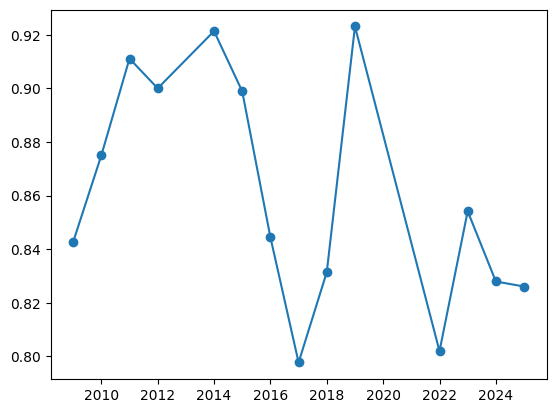

In [15]:
import matplotlib.pyplot as plt

years = [2009, 2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2022, 2023, 2024, 2025]

plt.scatter(years, season_score)
plt.plot(years, season_score)

Calculate how the fit of the model has changed over the past ~15 years (removed 2012-2013, 2019-2020, and 2020-2021 due to shorter seasons):

I was expecting to have a trend of decreasing the score of the fit as time goes on, but it was very random and I couldn't identify a trend. I expected a decreasing score due to the style of play changing as time has gone on in the NHL. There is an overal trend of the score decreasing in the last 6 years since 2019, but there is no way to prove any kind of correlation. I think the usage of offensive defense (D) has increased so they would have stats more similar to forwards (W, C). I believed this would contribute to a lower score, and since that has become more popular, the scores would reflect that, but they didn't in a conclusive way.